In [62]:
import pandas as pd

# Function to split CSV file into five parts
def split_csv_file(input_file, output_file1, output_file2, output_file3, output_file4, output_file5):
    # Load the dataset
    data = pd.read_csv(input_file)
    
    # Calculate the size for each part
    part_size = len(data) // 5
    
    # Split the dataset into five parts
    data_parts = [data.iloc[i*part_size:(i+1)*part_size] for i in range(5)]
    
    # Save the five parts into separate CSV files
    output_files = [output_file1, output_file2, output_file3, output_file4, output_file5]
    for i, part in enumerate(data_parts):
        part.to_csv(output_files[i], index=False)
    
    print(f"Data successfully split into {', '.join(output_files)}")

# Example usage
input_file = r"/home/saipranav/Desktop/fedl/tt/x.csv"
output_files = [rf"/home/saipranav/Desktop/fedl/tt/\x_part{i}.csv" for i in range(1, 6)]

split_csv_file(input_file, *output_files)  # Correct unpacking


Data successfully split into /home/saipranav/Desktop/fedl/tt/\x_part1.csv, /home/saipranav/Desktop/fedl/tt/\x_part2.csv, /home/saipranav/Desktop/fedl/tt/\x_part3.csv, /home/saipranav/Desktop/fedl/tt/\x_part4.csv, /home/saipranav/Desktop/fedl/tt/\x_part5.csv


In [28]:
import pandas as pd

# Function to split CSV file into 10 parts
def split_csv_file(input_file, output_files):
    # Load the dataset
    data = pd.read_csv(input_file)
    
    # Calculate the size for each part
    part_size = len(data) // 10
    
    # Split the dataset into 10 parts
    data_parts = [data.iloc[i*part_size:(i+1)*part_size] for i in range(10)]
    
    # Save the 10 parts into separate CSV files
    for i, part in enumerate(data_parts):
        part.to_csv(output_files[i], index=False)
    
    print(f"Data successfully split into {', '.join(output_files)}")

# Example usage
input_file = r"/home/saipranav/Desktop/fedl/10 clients/x.csv"
output_files = [rf"/home/saipranav/Desktop/fedl/10 clients/x_part{i}.csv" for i in range(1, 11)]

split_csv_file(input_file, output_files)  # Correct unpacking


Data successfully split into /home/saipranav/Desktop/fedl/10 clients/x_part1.csv, /home/saipranav/Desktop/fedl/10 clients/x_part2.csv, /home/saipranav/Desktop/fedl/10 clients/x_part3.csv, /home/saipranav/Desktop/fedl/10 clients/x_part4.csv, /home/saipranav/Desktop/fedl/10 clients/x_part5.csv, /home/saipranav/Desktop/fedl/10 clients/x_part6.csv, /home/saipranav/Desktop/fedl/10 clients/x_part7.csv, /home/saipranav/Desktop/fedl/10 clients/x_part8.csv, /home/saipranav/Desktop/fedl/10 clients/x_part9.csv, /home/saipranav/Desktop/fedl/10 clients/x_part10.csv


In [2]:
import pandas as pd
import numpy as np
import os

def split_csv(input_file):
    # Read the CSV file
    df = pd.read_csv(input_file)
    
    # Shuffle the data
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Calculate split indices
    total_rows = len(df)
    split_1 = int(0.7 * total_rows)
    split_2 = int(0.85 * total_rows)  # 70% + 15%
    
    # Split the dataframe
    part1 = df[:split_1]  # First 70%
    part2 = df[split_1:split_2]  # Next 15%
    part3 = df[split_2:]  # Last 15%
    
    # Get directory of input file
    dir_name = os.path.dirname(input_file)
    
    # Generate output file paths
    part1_path = os.path.join(dir_name, "part1.csv")
    part2_path = os.path.join(dir_name, "part2.csv")
    part3_path = os.path.join(dir_name, "part3.csv")
    
    # Save to CSV files in the same directory
    part1.to_csv(part1_path, index=False)
    part2.to_csv(part2_path, index=False)
    part3.to_csv(part3_path, index=False)
    
    print(f"Files saved: \n{part1_path}\n{part2_path}\n{part3_path}")

# Example usage
split_csv(r"/home/saipranav/Desktop/fedl/new1/x.csv")  # Replace with actual CSV file path


Files saved: 
/home/saipranav/Desktop/fedl/new1/part1.csv
/home/saipranav/Desktop/fedl/new1/part2.csv
/home/saipranav/Desktop/fedl/new1/part3.csv


In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to read CSV files and calculate metrics
def evaluate_model(original_labels_csv, predicted_labels_csv):
    # Reading the CSV files
    original_df = pd.read_csv(original_labels_csv)
    predicted_df = pd.read_csv(predicted_labels_csv)
    
    # Assuming the labels are in a column named 'label'
    original_labels = original_df['cent_labels']
    predicted_labels = predicted_df['c5_labels']
    
    # Calculating the metrics
    accuracy = accuracy_score(original_labels, predicted_labels)
    precision = precision_score(original_labels, predicted_labels)
    recall = recall_score(original_labels, predicted_labels)
    f1 = f1_score(original_labels, predicted_labels)
    
    # Returning the results
    return accuracy, precision, recall, f1

# Example usage
original_labels_csv = r"/home/saipranav/Desktop/fedl/tt4/x_part6.csv"
predicted_labels_csv = r"/home/saipranav/Desktop/fedl/tt4/x_part6.csv"
accuracy, precision, recall, f1 = evaluate_model(original_labels_csv, predicted_labels_csv)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9989467031809564
Precision: 0.8743718592964824
Recall: 0.8325358851674641
F1 Score: 0.8529411764705881


In [5]:
import pandas as pd

# Function to filter and save entries based on 'local_labels' column
def filter_and_save_entries(input_csv, output_csv_filtered):
    # Reading the CSV file
    df = pd.read_csv(input_csv)
    
    # Filtering entries where 'local_labels' is 1
    filtered_df = df[df['local_labels'] == 1]
    
    # Saving filtered entries to a new CSV file
    filtered_df.to_csv(output_csv_filtered, index=False)

# Example usage
input_csv = r"C:\Users\PRANAV\OneDrive\Desktop\fedl\5 clients\x_part5.csv"
output_csv_filtered = r"C:\Users\PRANAV\OneDrive\Desktop\fedl\5 clients\x_part5_anomalies.csv"
filter_and_save_entries(input_csv, output_csv_filtered)

print("Filtered entries saved to:", output_csv_filtered)


Filtered entries saved to: C:\Users\PRANAV\OneDrive\Desktop\fedl\5 clients\x_part5_anomalies.csv


In [26]:
import pandas as pd

# Function to add final_label based on c1_labels to c10_labels
def add_final_label(input_csv):
    # Read the CSV file
    df = pd.read_csv(input_csv)
    
    # # Check if the required columns are present
    # required_columns = [f'c{i}_labels' for i in range(1, 11)]
    # for col in required_columns:
    #     if col not in df.columns:
    #         print(f"The required column '{col}' is not present in the CSV file.")
    #         return
    
    # Apply the logic to create final_label
    df['final_label'] = ( (df['c9_labels'] == 1) & (df['c1_labels'] == 1) & 
                         (df['c2_labels'] == 1) & (df['c3_labels'] == 1) & (df['c4_labels'] == 1) & 
                         (df['c5_labels'] == 1) & (df['c6_labels'] == 1) & (df['c7_labels'] == 1) & 
                         (df['c8_labels'] == 1)).astype(int)
    
    # Save the updated DataFrame to the same CSV file
    df.to_csv(input_csv, Index=False)

# Example usage
input_csv = r"C:\Users\PRANAV\OneDrive\Desktop\model2\10 clients\x_part10_anomalies.csv"

add_final_label(input_csv)

print(f"Final labeled data added to the input file: {input_csv}")


Final labeled data added to the input file: C:\Users\PRANAV\OneDrive\Desktop\model2\10 clients\x_part10_anomalies.csv


In [34]:
import pandas as pd

# Function to add final_label based on c1_labels to c10_labels
def add_final_label(input_csv):
    # Read the CSV file
    df = pd.read_csv(input_csv)
    
    # Apply the logic to create final_label
    # Count the number of columns with value 0 for the specified columns
    df['final_label_q2'] = (df[['scores_c1_labels','scores_c3_labels','local_labels','scores_c2_labels']].eq(0).sum(axis=1) <2).astype(int)
    
    # Save the updated DataFrame to the same CSV file
    df.to_csv(input_csv, index=False)

# Example usage
input_csv = r"/home/saipranav/Desktop/fedl/exp/x_part4.csv"

add_final_label(input_csv)

print(f"Final labeled data added to the input file: {input_csv}")


Final labeled data added to the input file: /home/saipranav/Desktop/fedl/exp/x_part4.csv


In [20]:
import pandas as pd

# Function to add final_label based on c1_labels to c10_labels
def add_final_label(input_csv):
    # Read the CSV file
    df = pd.read_csv(input_csv)
    
    # Apply the logic to create final_label
    # Count the number of columns with value 0 for the specified columns
    df['final_label_q2'] = (df[['c1_labels','c2_labels','c3_labels','c4_labels','c5_labels']].eq(0).sum(axis=1) <2).astype(int)
    
    # Save the updated DataFrame to the same CSV file
    df.to_csv(input_csv, index=False)

# Example usage
input_csv = r"/home/saipranav/Desktop/fedl/tt3/x_part6.csv"

add_final_label(input_csv)

print(f"Final labeled data added to the input file: {input_csv}")


Final labeled data added to the input file: /home/saipranav/Desktop/fedl/tt3/x_part6.csv


In [10]:
import pandas as pd

# Function to label based on thresholds
def label_based_on_thresholds(input_file, columns, thresholds):
    # Load the dataset
    data = pd.read_csv(input_file)
    
    # Iterate over the specified columns and thresholds
    for col, threshold in zip(columns, thresholds):
        label_col = f'{col}_labels'  # New column name (e.g., c2_labels, c3_labels, etc.)
        
        # Create new column based on threshold
        data[label_col] = data[col].apply(lambda x: 1 if x > threshold else 0)
    
    # Save the updated dataset
    output_file = input_file.replace(".csv", "_labeled.csv")
    data.to_csv(output_file, index=False)
    
    print(f"New columns created and saved to {output_file}")

# Example usage
input_file = r"/home/saipranav/Desktop/fedl/10c/x_part10.csv"

# Manually specify the columns and their corresponding thresholds
columns = ['scores_c1', 'scores_c2', 'scores_c3', 'scores_c4', 'scores_c5', 'scores_c6', 'scores_c7', 'scores_c8', 'scores_c9','scores_c10']
thresholds = [0.512232,0.527041,0.522089,0.570588,0.546208,0.562947,0.555284,0.555297,0.541829,0.567947]  # Example thresholds for scores_c2 to scores_c10


label_based_on_thresholds(input_file, columns, thresholds)


New columns created and saved to /home/saipranav/Desktop/fedl/10c/x_part10_labeled.csv


In [12]:
import pandas as pd

# Function to label based on thresholds
def label_based_on_thresholds(input_file, columns, thresholds):
    # Load the dataset
    data = pd.read_csv(input_file)
    
    # Iterate over the specified columns and thresholds
    for col, threshold in zip(columns, thresholds):
        label_col = f'{col}_labels'  # New column name (e.g., c2_labels, c3_labels, etc.)
        
        # Create new column based on threshold
        data[label_col] = data[col].apply(lambda x: 1 if x > threshold else 0)
    
    # Save the updated dataset
    output_file = input_file.replace(".csv", "_labeled.csv")
    data.to_csv(output_file, index=False)
    
    print(f"New columns created and saved to {output_file}")

# Example usage
input_file = r"/home/saipranav/Desktop/fedl/tt3/x_part5.csv"

# Manually specify the columns and their corresponding thresholds
columns = ['Anomaly_Score','scores_c1', 'scores_c2','scores_c3','scores_c4']
thresholds = [0.527033,0.523233,0.528817,0.529944,0.519579]  # Example thresholds for scores_c2 to scores_c10


label_based_on_thresholds(input_file, columns, thresholds)


New columns created and saved to /home/saipranav/Desktop/fedl/tt3/x_part5_labeled.csv


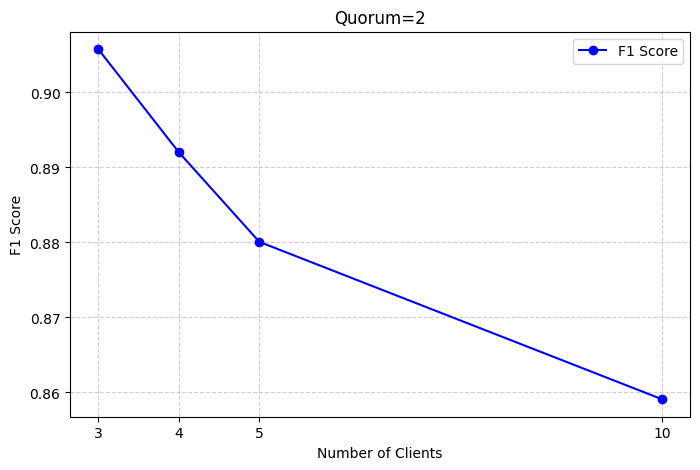

In [3]:
import matplotlib.pyplot as plt

# Data
num_clients = [3, 4, 5, 10]
f1_scores = [0.905766, 0.892025, 0.88008, 0.8591]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(num_clients, f1_scores, marker='o', linestyle='-', color='b', label="F1 Score")

# Labels and Title
plt.xlabel("Number of Clients")
plt.ylabel("F1 Score")
plt.title("Quorum=2")
plt.xticks(num_clients)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show plot
plt.show()


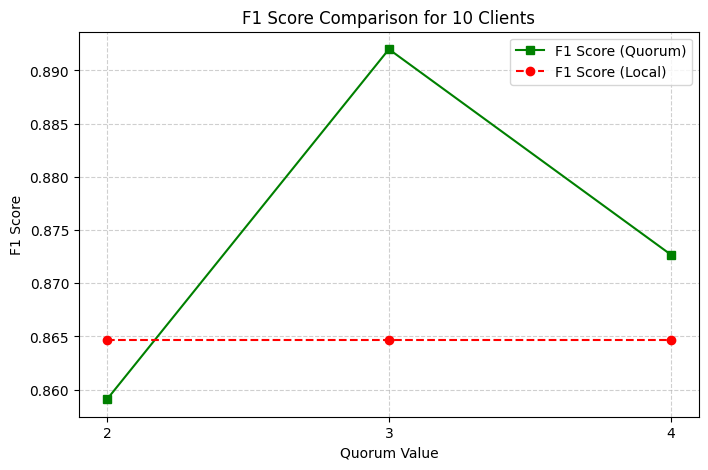

In [1]:
import matplotlib.pyplot as plt

# Data
quorum_values = [2, 3, 4]
f1_scores_q = [0.8591, 0.892, 0.8727]  # F1 scores for quorum-based model
f1_scores_local = [0.86463, 0.86463, 0.86463]  # Constant F1 score for local model

# Plot
plt.figure(figsize=(8, 5))
plt.plot(quorum_values, f1_scores_q, marker='s', linestyle='-', color='g', label="F1 Score (Quorum)")
plt.plot(quorum_values, f1_scores_local, marker='o', linestyle='--', color='r', label="F1 Score (Local)")

# Labels and Title
plt.xlabel("Quorum Value")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison for 10 Clients")
plt.xticks(quorum_values)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show plot
plt.show()



In [17]:
import pandas as pd
import numpy as np
import os

def split_csv(input_file):
    # Read the CSV file
    df = pd.read_csv(input_file)
    
    # Shuffle the data
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Calculate split indices
    total_rows = len(df)
    split_1 = int(0.95 * total_rows)
    split_2 = int(0.98 * total_rows)  # 95% + 3%
    
    # Split the dataframe
    part1 = df[:split_1]  # First 95%
    part2 = df[split_1:split_2]  # Next 3%
    part3 = df[split_2:]  # Last 2%
    
    # Get directory of input file
    dir_name = os.path.dirname(input_file)
    
    # Generate output file paths
    part1_path = os.path.join(dir_name, "part1.csv")
    part2_path = os.path.join(dir_name, "part2.csv")
    part3_path = os.path.join(dir_name, "part3.csv")
    
    # Save to CSV files in the same directory
    part1.to_csv(part1_path, index=False)
    part2.to_csv(part2_path, index=False)
    part3.to_csv(part3_path, index=False)
    
    print(f"Files saved: \n{part1_path}\n{part2_path}\n{part3_path}")

# Example usage
split_csv(r"/home/saipranav/Desktop/fedl/new2/x.csv")  # Replace with actual CSV file path


Files saved: 
/home/saipranav/Desktop/fedl/new2/part1.csv
/home/saipranav/Desktop/fedl/new2/part2.csv
/home/saipranav/Desktop/fedl/new2/part3.csv


In [20]:
import pandas as pd

# Define weights
w1 = 0.2
w2 = 0.15
w3 = 0.2
w4 = 0.05
w5 =0.1
w6 =0.05
w7 =0.05
w8 =0.05
w9 =0.1
w10 =0.05

# Load CSV file
input_file = r"/home/saipranav/Desktop/fedl/10c/x_part10.csv"  # Change this to your actual file path
df = pd.read_csv(input_file)

# Compute final_score
df["final_score"] = w1 * df["scores_c1"] + w2 * df["scores_c2"] + w3 * df["scores_c3"] + w4 * df["scores_c4"] + w5 * df["scores_c5"] + w6 * df["scores_c6"] + w7 * df["scores_c7"] + w8 * df["scores_c8"] + w9 * df["scores_c9"] + w10 * df["scores_c10"]

# Save the updated CSV file
output_file = r"/home/saipranav/Desktop/fedl/10c/x_part10.csv"
df.to_csv(output_file, index=False)

print(f"Updated CSV saved as {output_file}")


Updated CSV saved as /home/saipranav/Desktop/fedl/10c/x_part10.csv


In [26]:
import pandas as pd

# Define weights
w1 = 0.25
w2 = 0.125
w3 = 0.375
w4 = 0.125
w5 = 0.125
# Load CSV file
input_file = r"/home/saipranav/Desktop/fedl/tt4/x_part6.csv"  # Change this to your actual file path
df = pd.read_csv(input_file)

# Compute final_score
df["final_score"] = w1 * df["scores_c1"] + w2 * df["scores_c2"] + w3 * df["scores_c3"] + w4 * df["scores_c4"] + w5 * df["scores_c5"]

# Save the updated CSV file
output_file = r"/home/saipranav/Desktop/fedl/tt4/x_part6.csv"
df.to_csv(output_file, index=False)

print(f"Updated CSV saved as {output_file}")


Updated CSV saved as /home/saipranav/Desktop/fedl/tt4/x_part6.csv


In [25]:
import pandas as pd
import os

def split_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Shuffle the data to ensure randomness
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Define split percentages
    percentages = [0.2, 0.1, 0.3, 0.1, 0.1, 0.2]
    
    # Compute split indices
    total_rows = len(df)
    split_indices = [int(total_rows * p) for p in percentages]
    
    # Adjust the last split to match total rows exactly (avoid rounding issues)
    split_indices[-1] = total_rows - sum(split_indices[:-1])
    
    # Generate split dataframes
    start = 0
    for i, size in enumerate(split_indices):
        split_df = df.iloc[start:start + size]
        start += size
        
        # Save the split file
        base_name, ext = os.path.splitext(file_path)
        split_file_name = f"{base_name}_part{i+1}{ext}"
        split_df.to_csv(split_file_name, index=False)
        print(f"Saved: {split_file_name}")

# Example usage
file_path = r"/home/saipranav/Desktop/fedl/tt4/x.csv" # Change this to your actual file
split_csv(file_path)


Saved: /home/saipranav/Desktop/fedl/tt4/x_part1.csv
Saved: /home/saipranav/Desktop/fedl/tt4/x_part2.csv
Saved: /home/saipranav/Desktop/fedl/tt4/x_part3.csv
Saved: /home/saipranav/Desktop/fedl/tt4/x_part4.csv
Saved: /home/saipranav/Desktop/fedl/tt4/x_part5.csv
Saved: /home/saipranav/Desktop/fedl/tt4/x_part6.csv


In [5]:
import pandas as pd

def split_csv(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Calculate the total number of rows
    total_rows = len(df)

    # Calculate the number of rows for each percentage
    rows_16_percent = int(total_rows * 0.16)
    rows_20_percent = int(total_rows * 0.20)

    # Split the DataFrame into portions
    df_1 = df.head(rows_16_percent)
    df_2 = df.iloc[rows_16_percent:rows_16_percent*2]
    df_3 = df.iloc[rows_16_percent*2:rows_16_percent*3]
    df_4 = df.iloc[rows_16_percent*3:rows_16_percent*4]
    df_5 = df.iloc[rows_16_percent*4:rows_16_percent*5]
    df_6 = df.iloc[rows_16_percent*5:]

    # Ensure df_6 takes the remaining rows for 20%
    df_6 = df.iloc[rows_16_percent*5:]

    # Save each portion to a new CSV file
    file_name = file_path.split('.')[0]
    df_1.to_csv(f"{file_name}_16_1.csv", index=False)
    df_2.to_csv(f"{file_name}_16_2.csv", index=False)
    df_3.to_csv(f"{file_name}_16_3.csv", index=False)
    df_4.to_csv(f"{file_name}_16_4.csv", index=False)
    df_5.to_csv(f"{file_name}_16_5.csv", index=False)
    df_6.to_csv(f"{file_name}_20.csv", index=False)

# Example usage
split_csv(r"/home/saipranav/Desktop/fedl/tt3/x.csv")


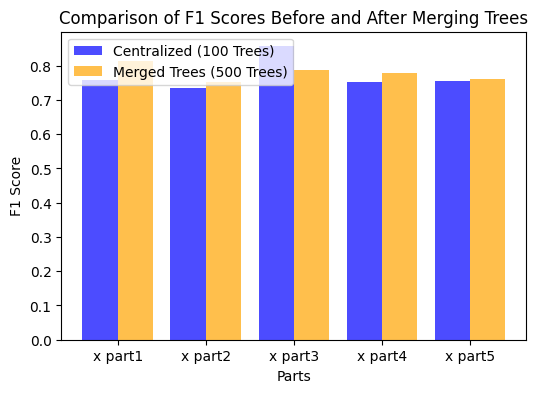

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ["x part1", "x part2", "x part3", "x part4", "x part5"]
f1_scores_centralized = [0.7591, 0.7353, 0.8564, 0.7519, 0.7566]
f1_scores_merged = [0.8133, 0.7512, 0.7876, 0.7783, 0.7604]

x = np.arange(len(categories))  # x locations for the groups
width = 0.4  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))
bars1 = ax.bar(x - width/2, f1_scores_centralized, width, label='Centralized (100 Trees)', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, f1_scores_merged, width, label='Merged Trees (500 Trees)', color='orange', alpha=0.7)

# Labels and Titles
ax.set_xlabel("Parts")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores Before and After Merging Trees")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()



# Show the plot
plt.show()


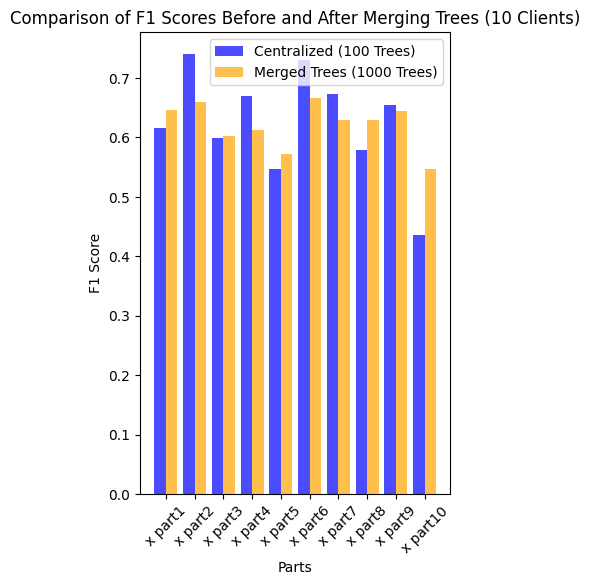

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = [
    "x part1", "x part2", "x part3", "x part4", "x part5",
    "x part6", "x part7", "x part8", "x part9", "x part10"
]
f1_scores_centralized = [0.6153, 0.7401, 0.5991, 0.6695, 0.5462, 0.7299, 0.6724, 0.5783, 0.6541, 0.4354]
f1_scores_merged = [0.6468, 0.6588, 0.6016, 0.6124, 0.5727, 0.6667, 0.6290, 0.6293, 0.6444, 0.5463]

x = np.arange(len(categories))  # x locations for the groups
width = 0.4  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(4, 6))
bars1 = ax.bar(x - width/2, f1_scores_centralized, width, label='Centralized (100 Trees)', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, f1_scores_merged, width, label='Merged Trees (1000 Trees)', color='orange', alpha=0.7)

# Labels and Titles
ax.set_xlabel("Parts")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores Before and After Merging Trees (10 Clients)")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()



# Show the plot
plt.show()


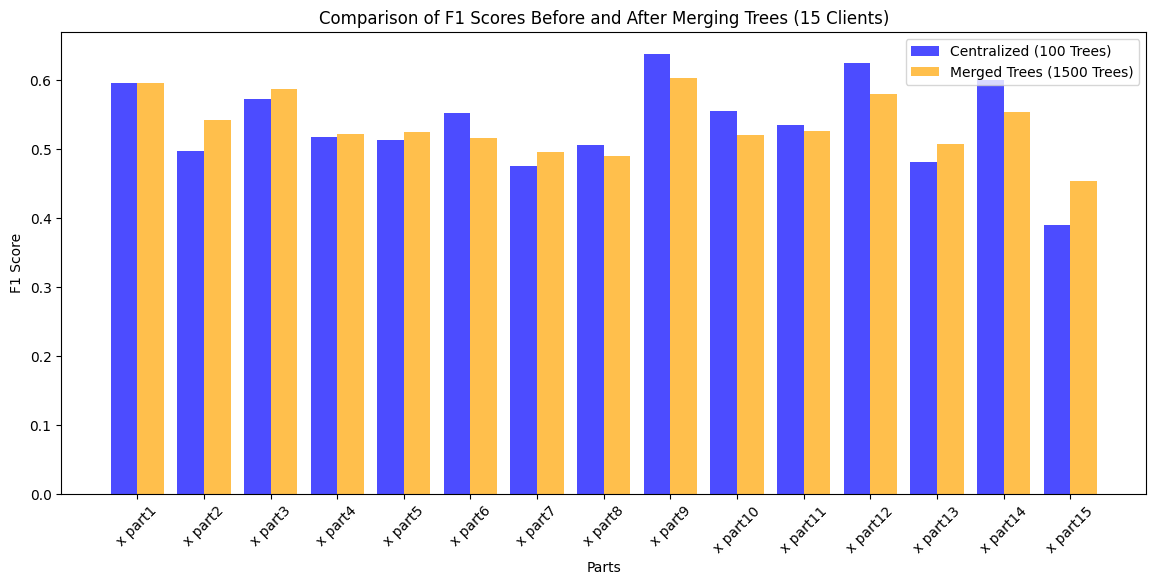

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = [
    "x part1", "x part2", "x part3", "x part4", "x part5",
    "x part6", "x part7", "x part8", "x part9", "x part10",
    "x part11", "x part12", "x part13", "x part14", "x part15"
]
f1_scores_centralized = [
    0.5955, 0.4974, 0.5729, 0.5171, 0.5131, 
    0.5514, 0.4753, 0.5056, 0.6375, 0.5555,
    0.5352, 0.6242, 0.4804, 0.6000, 0.3894
]
f1_scores_merged = [
    0.5955, 0.5424, 0.5871, 0.5221, 0.5241, 
    0.5151, 0.4949, 0.4891, 0.6034, 0.5203,
    0.5254, 0.5798, 0.5078, 0.5530, 0.4540
]

x = np.arange(len(categories))  # x locations for the groups
width = 0.4  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, f1_scores_centralized, width, label='Centralized (100 Trees)', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, f1_scores_merged, width, label='Merged Trees (1500 Trees)', color='orange', alpha=0.7)

# Labels and Titles
ax.set_xlabel("Parts")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores Before and After Merging Trees (15 Clients)")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()



# Show the plot
plt.show()


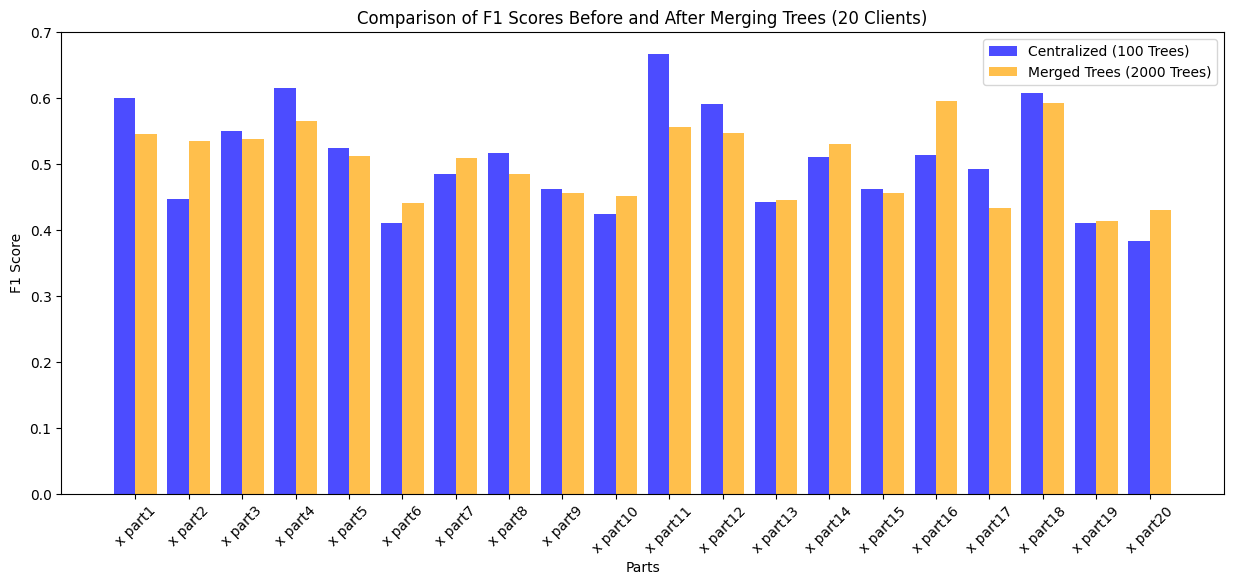

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = [
    "x part1", "x part2", "x part3", "x part4", "x part5",
    "x part6", "x part7", "x part8", "x part9", "x part10",
    "x part11", "x part12", "x part13", "x part14", "x part15",
    "x part16", "x part17", "x part18", "x part19", "x part20"
]
f1_scores_centralized = [
    0.6000, 0.4473, 0.5496, 0.6153, 0.5250,
    0.4103, 0.4845, 0.5161, 0.4625, 0.4242,
    0.6667, 0.5912, 0.4429, 0.5109, 0.4626,
    0.5131, 0.4932, 0.6071, 0.4109, 0.3841
]
f1_scores_merged = [
    0.5455, 0.5354, 0.5373, 0.5647, 0.5122,
    0.4414, 0.5098, 0.4848, 0.4568, 0.4517,
    0.5567, 0.5465, 0.4460, 0.5310, 0.4564,
    0.5954, 0.4337, 0.5930, 0.4138, 0.4296
]

x = np.arange(len(categories))  # x locations for the groups
width = 0.4  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x - width/2, f1_scores_centralized, width, label='Centralized (100 Trees)', color='blue', alpha=0.7)
ax.bar(x + width/2, f1_scores_merged, width, label='Merged Trees (2000 Trees)', color='orange', alpha=0.7)

# Labels and Titles
ax.set_xlabel("Parts")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores Before and After Merging Trees (20 Clients)")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Show the plot
plt.show()


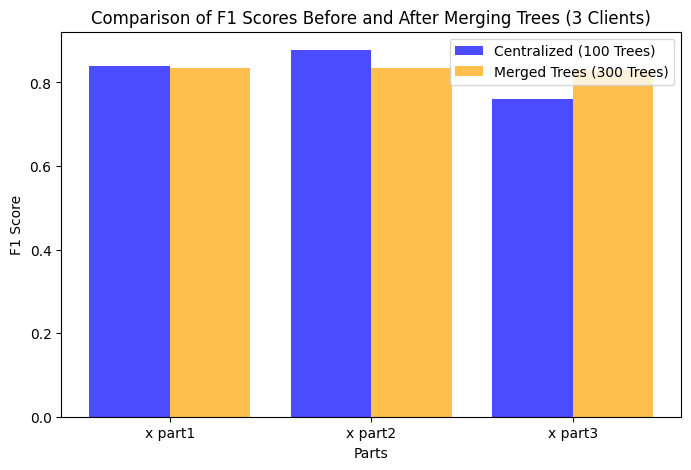

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ["x part1", "x part2", "x part3"]
f1_scores_centralized = [0.8386, 0.8776, 0.7602]
f1_scores_merged = [0.8347, 0.8347, 0.8294]

x = np.arange(len(categories))  # x locations for the groups
width = 0.4  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, f1_scores_centralized, width, label='Centralized (100 Trees)', color='blue', alpha=0.7)
ax.bar(x + width/2, f1_scores_merged, width, label='Merged Trees (300 Trees)', color='orange', alpha=0.7)

# Labels and Titles
ax.set_xlabel("Parts")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores Before and After Merging Trees (3 Clients)")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0)
ax.legend()

# Show the plot
plt.show()


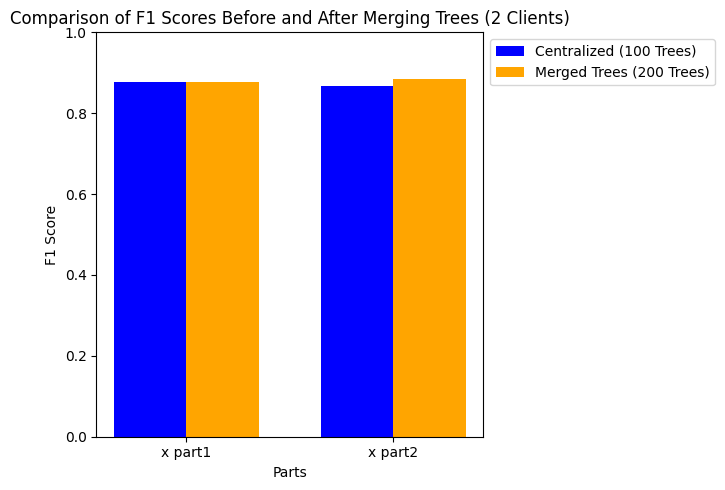

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data
clients = ['x part1', 'x part2']
f1_scores_centralized = [0.8784, 0.8662]  # F1 scores before merging trees
f1_scores_merged = [0.8777, 0.8842]  # F1 scores after merging trees

# Number of trees for labeling
num_trees_centralized = 100
num_trees_merged = 200

x = np.arange(len(clients))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(7, 5))

# Plot bars
bars1 = ax.bar(x - width/2, f1_scores_centralized, width, label=f'Centralized ({num_trees_centralized} Trees)', color='blue')
bars2 = ax.bar(x + width/2, f1_scores_merged, width, label=f'Merged Trees ({num_trees_merged} Trees)', color='orange')

# Labels and title
ax.set_xlabel('Parts')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores Before and After Merging Trees (2 Clients)')
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0, 1)

# Move legend outside to avoid covering bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


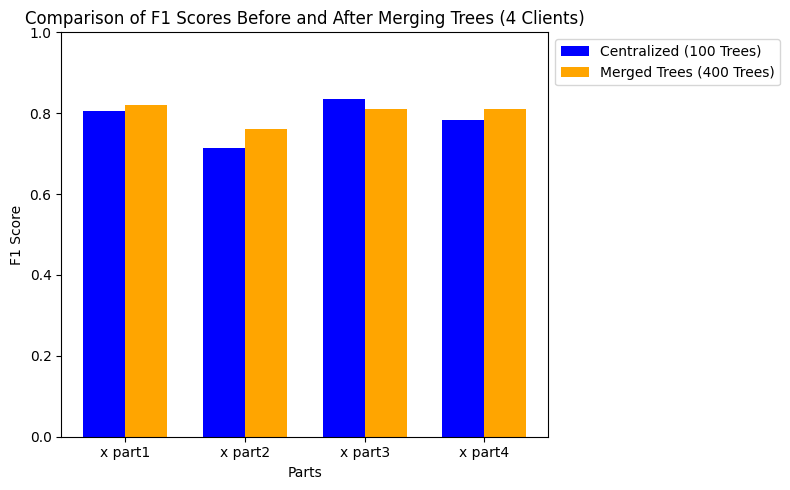

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data
clients = ['x part1', 'x part2', 'x part3', 'x part4']
f1_scores_centralized = [0.8056, 0.7143, 0.836, 0.7837]  # F1 scores before merging trees
f1_scores_merged = [0.8204, 0.7605, 0.8099, 0.8096]  # F1 scores after merging trees

# Number of trees for labeling
num_trees_centralized = 100
num_trees_merged = 400

x = np.arange(len(clients))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars1 = ax.bar(x - width/2, f1_scores_centralized, width, label=f'Centralized ({num_trees_centralized} Trees)', color='blue')
bars2 = ax.bar(x + width/2, f1_scores_merged, width, label=f'Merged Trees ({num_trees_merged} Trees)', color='orange')

# Labels and title
ax.set_xlabel('Parts')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores Before and After Merging Trees (4 Clients)')
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0, 1)

# Move legend outside to avoid covering bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


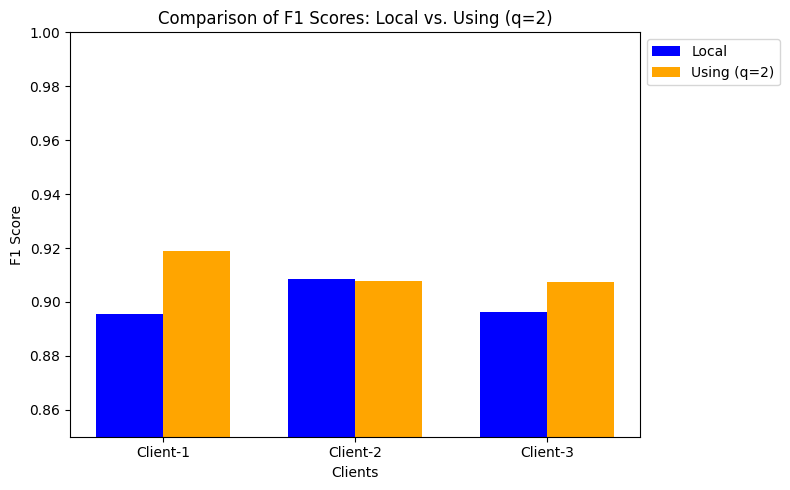

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Data
clients = ['Client-1', 'Client-2', 'Client-3']
f1_scores_local = [0.8957, 0.9085, 0.8964]  # Local F1 scores
f1_scores_q2 = [0.9188, 0.9079, 0.9073]  # F1 scores using q=2

x = np.arange(len(clients))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars1 = ax.bar(x - width/2, f1_scores_local, width, label='Local', color='blue')
bars2 = ax.bar(x + width/2, f1_scores_q2, width, label='Using (q=2)', color='orange')

# Labels and title
ax.set_xlabel('Clients')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores: Local vs. Using (q=2)')
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0.85, 1)  # Adjusting the y-axis for better visualization

# Move legend outside to avoid covering bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


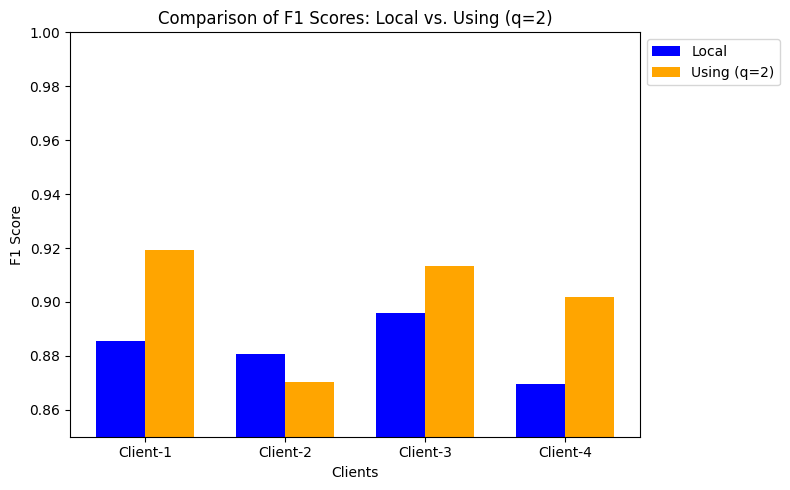

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Data
clients = ['Client-1', 'Client-2', 'Client-3', 'Client-4']
f1_scores_local = [0.8855, 0.8805, 0.896, 0.8697]  # Local F1 scores
f1_scores_q2 = [0.9193, 0.8702, 0.9133, 0.9017]  # F1 scores using q=2

x = np.arange(len(clients))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars1 = ax.bar(x - width/2, f1_scores_local, width, label='Local', color='blue')
bars2 = ax.bar(x + width/2, f1_scores_q2, width, label='Using (q=2)', color='orange')

# Labels and title
ax.set_xlabel('Clients')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores: Local vs. Using (q=2)')
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0.85, 1)  # Adjusting the y-axis for better visualization

# Move legend outside to avoid covering bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


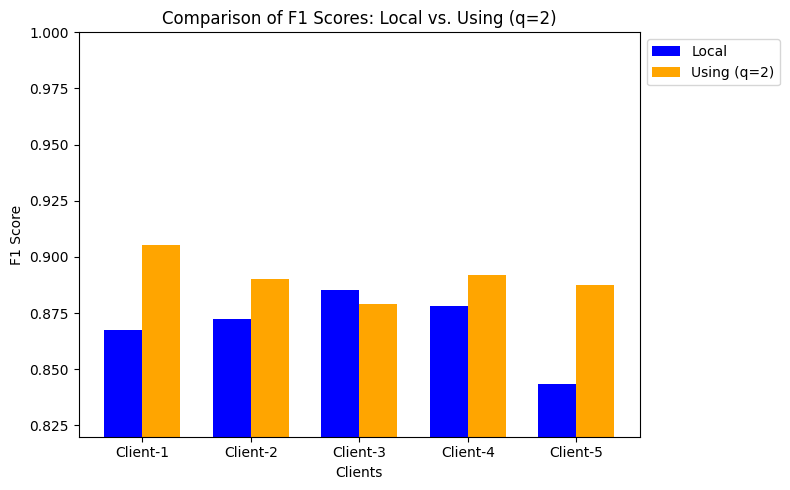

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Data
clients = ['Client-1', 'Client-2', 'Client-3', 'Client-4', 'Client-5']
f1_scores_local = [0.8673, 0.8725, 0.8854, 0.8783, 0.8433]  # Local F1 scores
f1_scores_q2 = [0.9055, 0.8901, 0.8789, 0.8920, 0.8875]  # F1 scores using q=2

x = np.arange(len(clients))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars1 = ax.bar(x - width/2, f1_scores_local, width, label='Local', color='blue')
bars2 = ax.bar(x + width/2, f1_scores_q2, width, label='Using (q=2)', color='orange')

# Labels and title
ax.set_xlabel('Clients')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores: Local vs. Using (q=2)')
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0.82, 1)  # Adjusting the y-axis for better visualization

# Move legend outside to avoid covering bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()
